In [320]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import latex
import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['text.usetex'] = True
latex_engine = 'pdflatex'
latex_elements = {
    'extrapackages': r'\usepackage{physics}',
    'extrapackages': r'\usepackage{amsmath}'
}
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)


%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:120])
colors_ls_cyc = itertools.cycle(colors_ls)
markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


USE_SYMMETRIES = True
BOUNDARY_COND = 'PBC'

dir = "../results/" + ("symmetries/" if USE_SYMMETRIES else "") + BOUNDARY_COND + '/'
print(dir)

../results/symmetries/PBC/


In [321]:
import decimal

def format_number(num):
    try:
        dec = decimal.Decimal(num)
    except:
        return 'bad'
    tup = dec.as_tuple()
    delta = len(tup.digits) + tup.exponent
    digits = ''.join(str(d) for d in tup.digits)
    if delta <= 0:
        zeros = abs(tup.exponent) - len(tup.digits)
        val = '0.' + ('0'*zeros) + digits
    else:
        val = digits[:delta] + ('0'*tup.exponent) + '.' + digits[delta:]
    val = val.rstrip('0')
    if val[-1] == '.':
        val = val[:-1]
    if tup.sign:
        return '-' + val
    return val

def order_of_magnitude(a_value):
    a_value = np.round(a_value, 6)
    if a_value - int(a_value) != 0:
        a_str = format_number(f'{a_value}')
        a_str = a_str.split(".")[1]
        return len(a_str)
    else:
        return 0

In [322]:
def info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz):
    arr = [J1, J2, delta1, delta2, eta1, eta2, hx, hz]
    names = ['J1', 'J2','d1', 'd2', 'e1', 'e2', 'hx', 'hz']
    info = "_L=%d"%L
    for i, var in enumerate(arr):
        n = order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info

def info_sym(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz, k, p, zx, zz):
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    if BOUNDARY_COND == 'PBC':                          info += ",k=%d"%k
    if BOUNDARY_COND == 'OBC' or (k==0 or k==L//2):     info += ",p=%d"%p
    if hz == 0:                                         info += ",zx=%d"%zx
    if hx == 0 and (L % 2 == 0 or hz != 0):             info += ",zz=%d"%zz
    return info

def info_dis(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz, w, pb):
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    n = order_of_magnitude(w)
    info +=  str(",w={:.%df}"%n).format(round(w, n))
    info += ",pb=%d"%pb
    return info

In [323]:
parity_sectors = [-1, 1]
def get_sectors(L, hx, hz):
    translation_real_sectors = [0, L // 2] if BOUNDARY_COND == 'PBC' else [0]
    translation_imag_sectors = range(1, L // 2)
    
    spin_flip_X_sectors = [-1, 1] if hz == 0 else [1]
    spin_flip_Z_sectors = [-1, 1] if hx == 0 and (L % 2 == 0 or hz != 0) else [1]

    real_sectors = [[ks, ps, zx, zz] for ks in translation_real_sectors for ps in parity_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]
    imag_sectors = [[kx, 1, zx, zz] for kx in translation_imag_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]

    return real_sectors, imag_sectors

# $$H=J\sum_\ell(1-\eta)S^x_\ell S^x_{\ell+1} + (1+\eta)S^y_\ell S^y_{\ell+1} + \Delta S^z_\ell S^z_{\ell+1}$$
# $$J^xJ^y\pm J^xJ^z\pm J^yJ^z=0\qquad\rightarrow\qquad 1-\eta^2\pm\Delta(1-\eta)\pm\Delta(1+\eta)=0$$
# $$\Delta=\pm\frac{1}{2}(1-\eta^2)\qquad \vee \qquad \Delta=\pm\frac{1}{2\eta}(1-\eta^2)$$

# RESULTS

In [22]:
eta=0.4
print( (1-eta**2)/2, (1-eta**2)/2/eta)

0.42 1.0499999999999998


0 -1 -1 -1 -2.625 2
0 -1 -1 -1 -2.625 2
0 -1 -1 -1 -0.875 4
0 -1 -1 -1 -0.875 4
0 -1 -1 -1 -0.875 4
0 -1 -1 -1 -0.875 4
0 -1 -1 1 -2.375 2
0 -1 -1 1 -2.375 2
0 -1 -1 1 -0.375 2
0 -1 -1 1 -0.375 2
0 -1 1 -1 -2.375 2
0 -1 1 -1 -2.375 2
0 -1 1 -1 -1.625 2
0 -1 1 -1 -1.625 2
0 -1 1 1 -0.875 5
0 -1 1 1 -0.875 5
0 -1 1 1 -0.875 5
0 -1 1 1 -0.875 5
0 -1 1 1 -0.875 5
0 1 -1 -1 -2.625 2
0 1 -1 -1 -2.625 2
0 1 -1 -1 -0.875 5
0 1 -1 -1 -0.875 5
0 1 -1 -1 -0.875 5
0 1 -1 -1 -0.875 5
0 1 -1 -1 -0.875 5
0 1 -1 1 -2.375 2
0 1 -1 1 -2.375 2
0 1 -1 1 -1.625 4
0 1 -1 1 -1.625 4
0 1 -1 1 -1.625 4
0 1 -1 1 -1.625 4
0 1 -1 1 -0.375 2
0 1 -1 1 -0.375 2
0 1 1 -1 -2.375 2
0 1 1 -1 -2.375 2
0 1 1 -1 -1.625 2
0 1 1 -1 -1.625 2
0 1 1 -1 -0.375 4
0 1 1 -1 -0.375 4
0 1 1 -1 -0.375 4
0 1 1 -1 -0.375 4
0 1 1 1 -2.625 4
0 1 1 1 -2.625 4
0 1 1 1 -2.625 4
0 1 1 1 -2.625 4
0 1 1 1 -0.875 4
0 1 1 1 -0.875 4
0 1 1 1 -0.875 4
0 1 1 1 -0.875 4
7 -1 -1 -1 -2.375 4
7 -1 -1 -1 -2.375 4
7 -1 -1 -1 -2.375 4
7 -1 -1 -1 -2.375 4
7

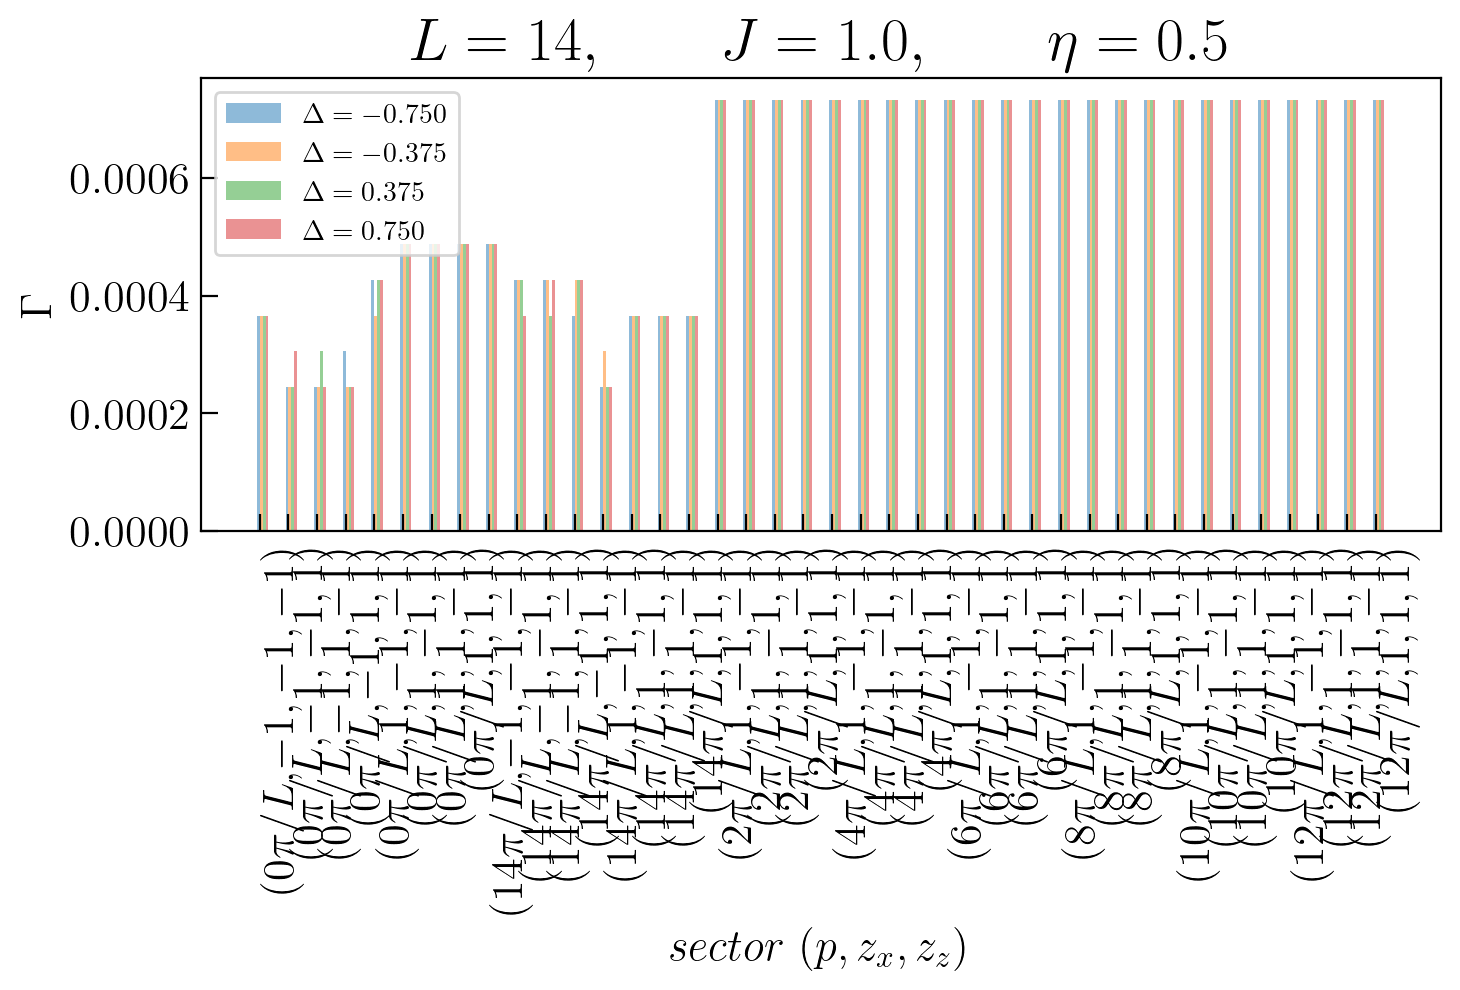

In [327]:

L=12
J1=1.0
d1=0.125
e1=0.5

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

sizes = np.array([10, 11, 12, 13, 14]) if BOUNDARY_COND == 'OBC' else np.array([12, 14, 15, 16])
sizes = [14]
deltas = [-0.75, -0.375, 0.375, 0.75]
#deltas = [0.42, 1.05, 1.68]
degen_sum = [[] for ii in range(len(deltas))]
for L in sizes:

    fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,3), dpi = 200, sharey=True, sharex=True)

    real_sec, imag_sec = get_sectors(L, hx, hz)

    dim_tot = 2**L
    for ii, d1 in enumerate(deltas):
    #for d1 in [0.75]:

        tot_degen = []
        sector_names = []
        dim_check = 0
        for [ks, ps, zxs, zzs] in (real_sec + imag_sec):
            sec_str = ""
            if BOUNDARY_COND == 'PBC':                          sec_str += "$(%d\pi/L$,"%(2*ks)
            else:                                               sec_str += "$($"
            if BOUNDARY_COND == 'OBC' or (k==0 or k==L//2):     sec_str += "$%d$"%ps
            if hz == 0:                                         sec_str += "$,%d$"%zxs
            if hx == 0 and (L % 2 == 0 or hz != 0):             sec_str += "$,%d)$"%zzs
            else:                                               sec_str += "$)$"
            sector_names.append(sec_str)

            name = dir + 'DIAGONALIZATION/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
            degen_num = 0
            if exists(name):
                with h5py.File(name, "r") as file:
                    try:
                        energies = np.array(file.get('eigenvalues')[0])
                    except Exception:
                        energies = np.array(file.get('eigenvalues/dataset')[0])
                    dim = energies.size
                    dim_check += dim

                    energies = np.round(energies, 13)
                    e_list = list(energies)
                    degen_num = 0
                    degen = 0
                    some_sum = 0
                    for Eueue in energies:
                        num_of_occur = e_list.count(Eueue)
                        #if num_of_occur > 4:
                        #    print(L, ps, xs, Eueue, num_of_occur)
                        some_sum += num_of_occur
                        if num_of_occur > 1:
                            print(ks, ps, zxs, zzs, Eueue, num_of_occur)
                            degen_num += 1
                        else:
                            degen += 1
                    
                    tot_degen.append(degen_num / dim_tot)
                    if degen + degen_num != dim:
                        print(L, ps, zzs, zxs, degen, degen_num, num_of_occur, dim)
            else:
                a=1
                print(name)
        print(dim_check, dim_tot)
        data = {'sectors': sector_names, 'degeneracies': tot_degen}
        
        
        ydata = np.array(data['degeneracies'])
        print(L, d1, np.sum(ydata))
        degen_sum[ii].append(np.sum(ydata))
        width = 0.1
        shift = - width/2 + width * ii
        bins = np.array([x + shift for x in range(1, len(ydata) + 1)])
        axis.bar(bins, ydata, width = width, label=r"$\Delta=%.3f$"%d1, linewidth=3, alpha=0.5)

        axis.set_xticks([x for x in range(1,len(ydata) + 1)])
    axis.set_xticklabels(data['sectors'], rotation=90, rotation_mode="anchor", ha="right")

    axis.legend()
        
    axis.set_ylabel(r"$\Gamma$", fontsize=16)
    axis.set_xlabel(r"$sector\ (p,z_x,z_z)$", fontsize=16)
    axis.tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis.tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)
    
    axis.set_title(r"$L=%d,\qquad J=%.1f,\qquad \eta=%.1f$"%(L, J1, e1), fontsize=22 )


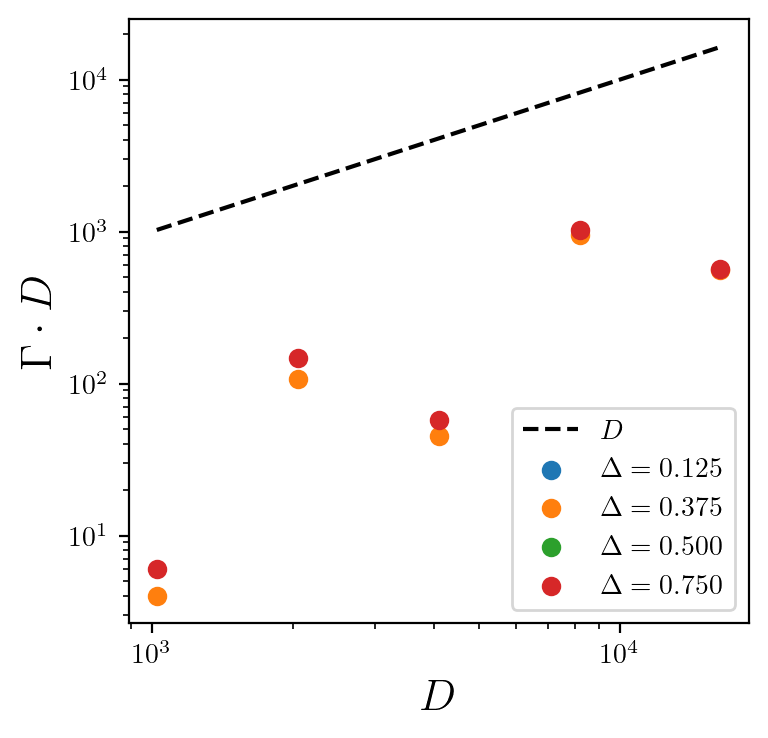

In [7]:

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(4,4), dpi = 200, sharey=True, sharex=True)

ax.plot(2**sizes, 2**sizes, ls='--', color='black', label=r"$D$")
for ii, del1 in enumerate(deltas):
    deg = np.array(degen_sum[ii])
    ax.scatter(2**sizes, 2**sizes * deg, label=r"$\Delta=%.3f$"%del1)
ax.set_xscale('log')
ax.set_yscale('log')
        
ax.set_ylabel(r"$\Gamma\cdot D$", fontsize=16)
ax.set_xlabel(r"$D$", fontsize=16)
ax.legend()

In [69]:
Ls_e=[12, 14, 16, 18, 20]
Ls_o=[13, 15, 17, 19]
print("OBC even", [int(2**L / (8)) for L in Ls_e])
print("OBC odd", [int(2**L / (4)) for L in Ls_o])

Ls_e=[16, 18, 20, 22, 24]
Ls_o=[15, 17, 19, 21, 23]
print("PBC even real", [int(2**L / (8*L)) for L in Ls_e])
print("PBC odd real", [int(2**L / (4*L)) for L in Ls_o])

print("PBC even imag", [int(2**L / (4*L)) for L in Ls_e])
print("PBC odd imag", [int(2**L / (2*L)) for L in Ls_o])

OBC even [512, 2048, 8192, 32768, 131072]
OBC odd [2048, 8192, 32768, 131072]
PBC even real [512, 1820, 6553, 23831, 87381]
PBC odd real [546, 1927, 6898, 24966, 91180]
PBC even imag [1024, 3640, 13107, 47662, 174762]
PBC odd imag [1092, 3855, 13797, 49932, 182361]


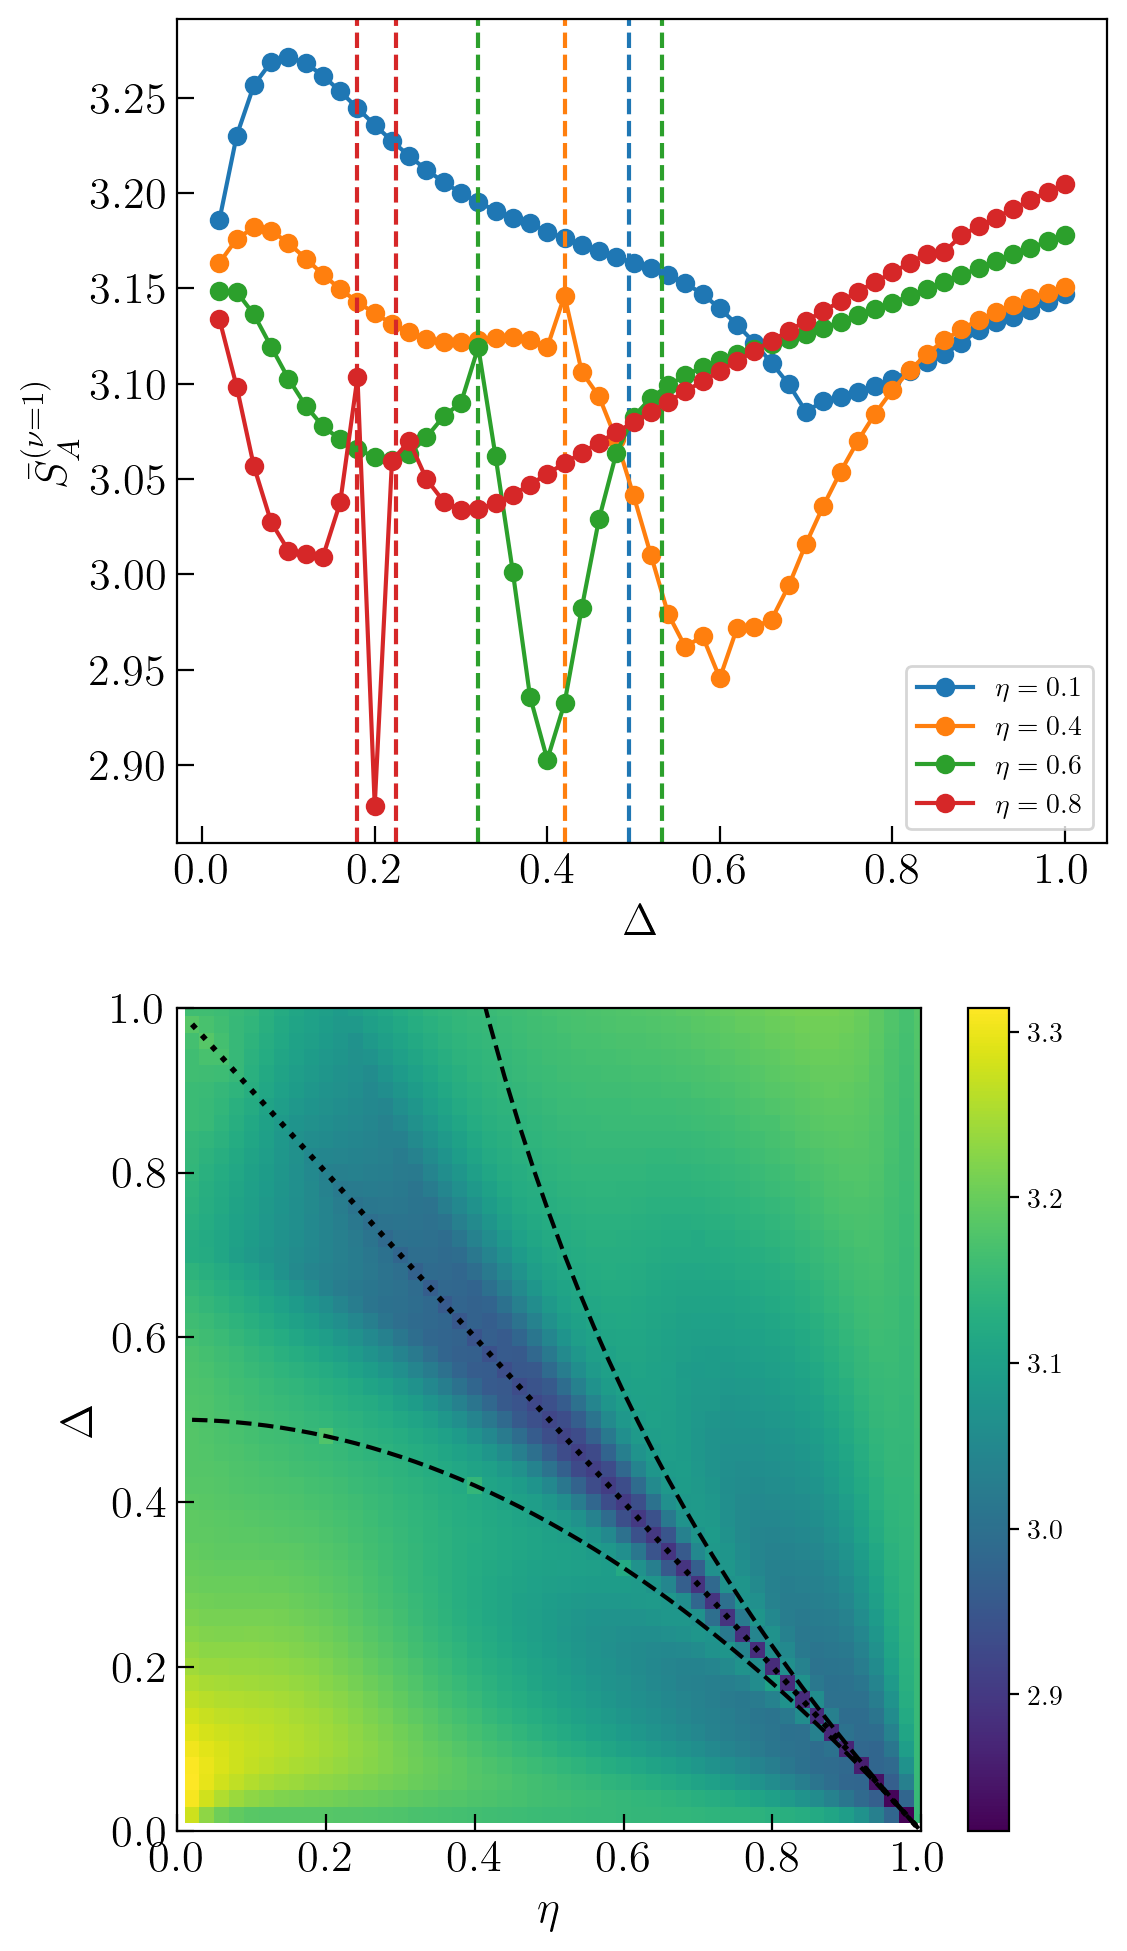

In [7]:

fig, axis = plt.subplots( nrows=2, ncols=1, figsize=(6,12), dpi = 200)
L=16

df = pd.read_csv(f'./RESULTS/OBC/entropy_sweep_nu=1_L={L}.csv') 

deltas = np.linspace(0.02, 1.00, 50)
etas = np.linspace(0.02, 1.00, 50)

X, Y = np.meshgrid(etas, deltas)
p = axis[1].pcolormesh(X, Y, np.array(df['LA=8']).reshape((50, 50)), shading='nearest')#, cmap='gnuplot')

def delta1(eta):
    return (1 - eta**2) / 2

def delta2(eta):
    return (1 - eta**2) / (2 * eta)

axis[1].plot(etas, delta1(etas), c='black', ls='--')
axis[1].plot(etas, delta2(etas), c='black', ls='--')
axis[1].plot(etas, 1-(etas), c='black', ls=':', lw=2)
fig.colorbar(p)

axis[1].set_xlim(0, 1)
axis[1].set_ylim(0, 1)

axis[1].set_xlabel('$\eta$', fontsize=16)
axis[1].set_ylabel('$\Delta$', fontsize=16)
axis[1].tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
axis[1].tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)

#axis[1].set_title(r'$\bar S_A^{(\nu=1)}$', fontsize=20)

for eta in [0.1, 0.2, 0.4, 0.6, 0.8]:
    entropy = df[ df['eta'] == eta ]['LA=8']
    if len(entropy) == 50:
        pl = axis[0].plot(deltas, entropy, marker='o', label=f"$\eta={eta}$")
    
        supersym_point = [delta1(eta), delta2(eta)]
        for sp in supersym_point:
            if sp < 1.0:
                axis[0].axvline(x=sp, ls='--', color=pl[0].get_color())

axis[0].set_xlabel('$\Delta$', fontsize=16)
axis[0].set_ylabel(r'$\bar S_A^{(\nu=1)}$', fontsize=16)
axis[0].tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
axis[0].tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)
axis[0].legend()


#plt.savefig("entropy_sweep.pdf", bbox_inches = 'tight', pad_inches=0.02)
#plt.savefig("entropy_sweep.png", bbox_inches = 'tight', pad_inches=0.02)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


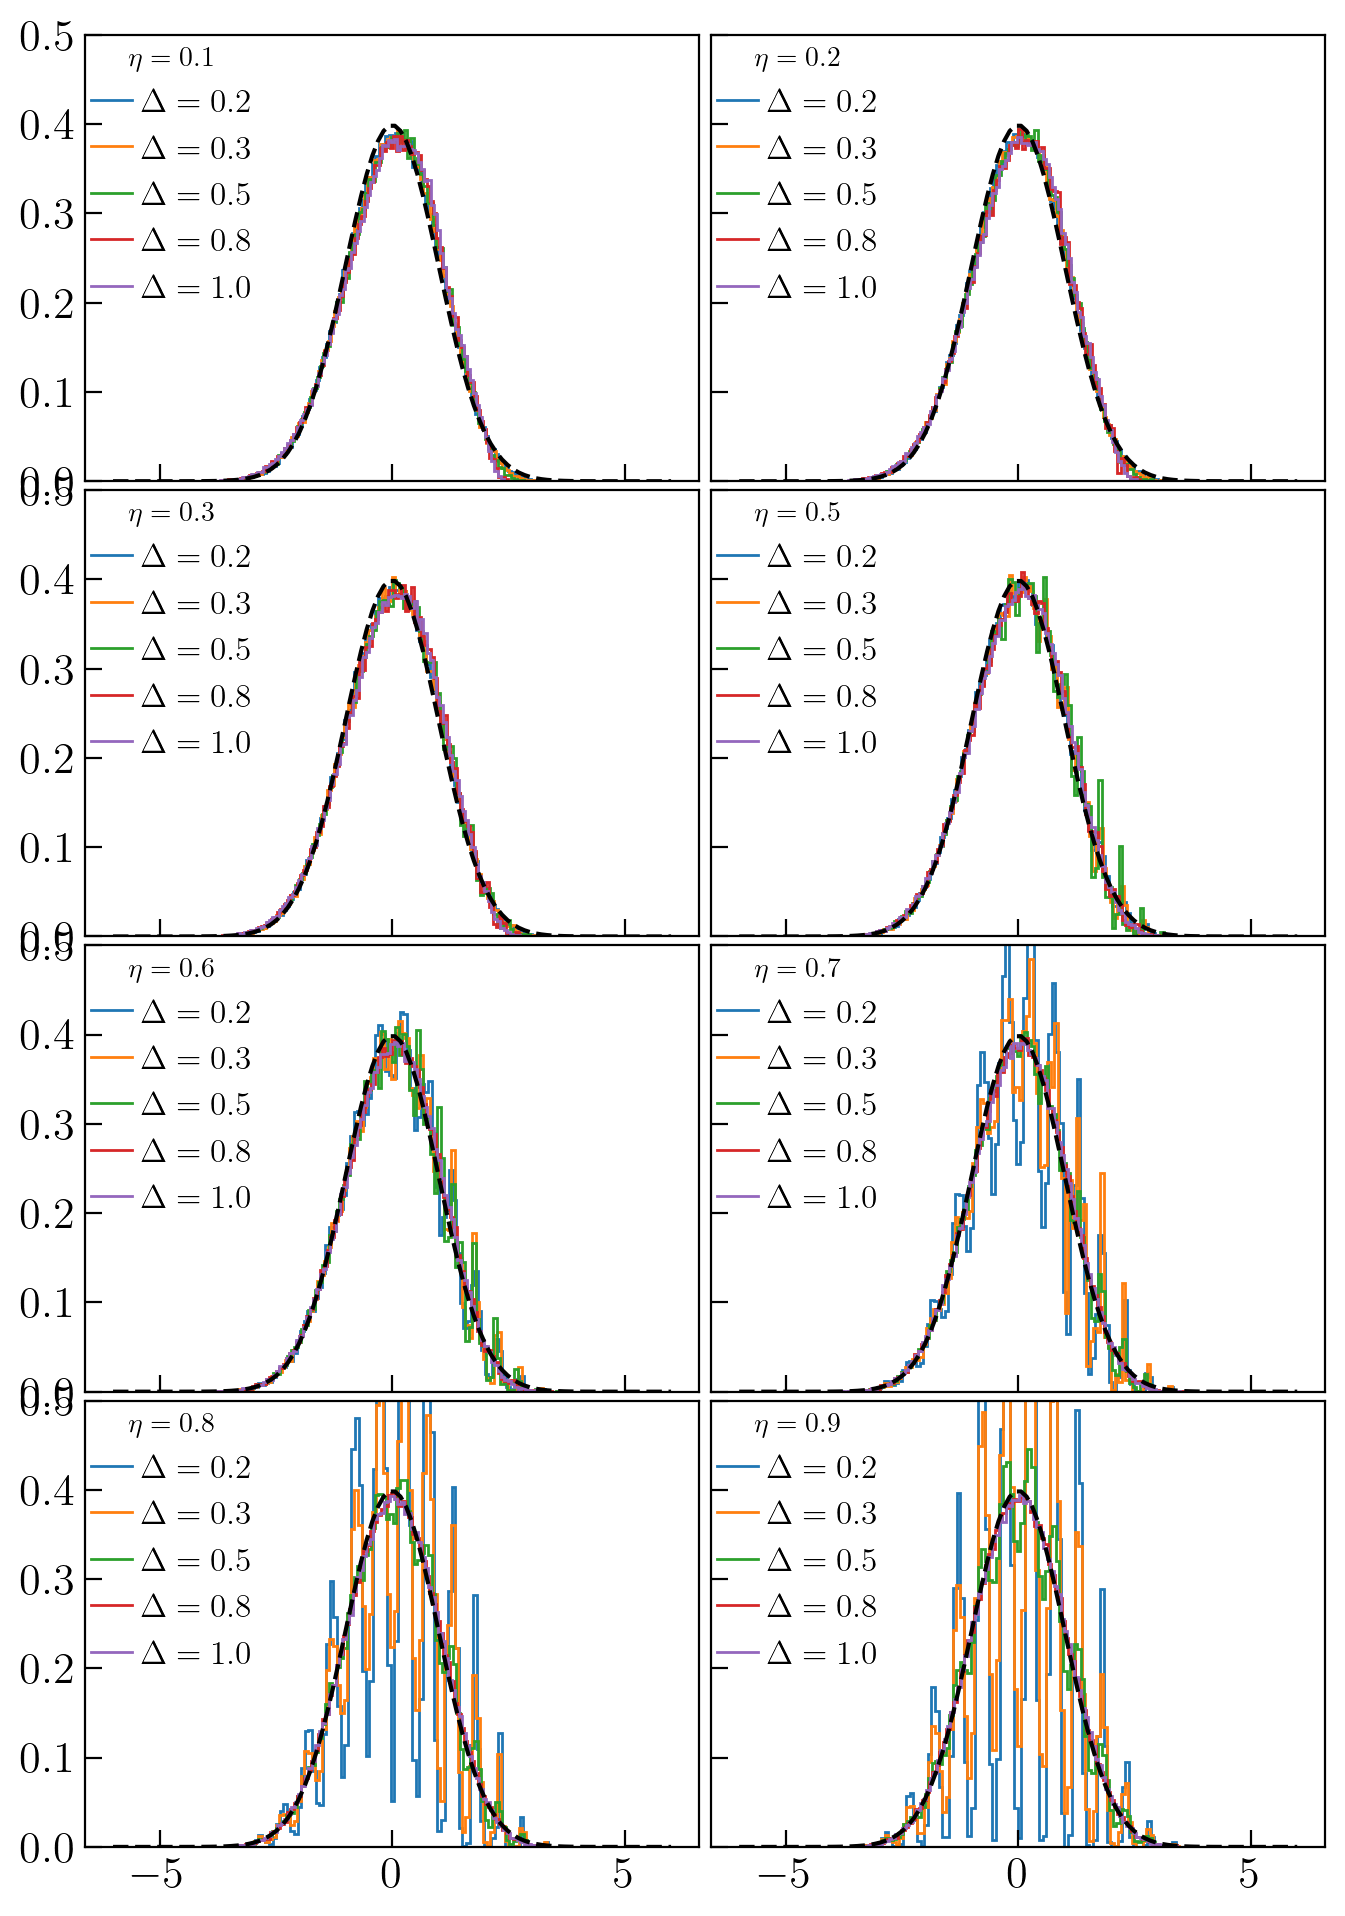

In [9]:

markers = itertools.cycle(markers_ls)

L=16

J1=1.0
d1=0.5
e1=0.3

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

f = 0.5
LA = int(L*f)
LA = 2

frac = lambda dim: 0.25 * dim

sizes = [16]

deltas = np.linspace(0.02, 1.00, 50)
etas = np.linspace(0.02, 1.00, 50)

fig, axis = plt.subplots( nrows=4, ncols=2, figsize=(8,12), dpi = 200, sharey=True)
axis = np.array(axis).flatten()

# deltas = [0.02, 0.1, 0.7]
# etas = [0.02, 0.5]
print(deltas)


real_sec, _ = get_sectors(L, hx, hz)

pred = L * (np.log(2) / 2 - 41 / 288)

dim_tot = 2**L
for jj, e1 in enumerate([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]):
    colors_ls_cyc = itertools.cycle(colors_ls)
    for ii, d1 in enumerate([0.2, 0.3, 0.5, 0.8, 1.0]):
        entropy = []
        energy = []
        for [ks, ps, zxs, zzs] in real_sec:
            name = dir + 'Entropy/Eigenstate/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
            if exists(name):
                with h5py.File(name, "r") as file:
                    energies = np.array(file.get('energies')[0])
                    entropies = np.array(file.get('entropy'))[LA]
                    
                    energies /= np.std(energies)
                    
                    energy = [*energy, *energies]
                    entropy = [*entropy, *entropies]
            else:
                print(name)

        #axis[jj].scatter(energy[::3], entropy[::3], s=(25 - 5 * ii), label=f"$\Delta={d1}$", color = next(colors_ls_cyc), facecolor='None')
        bins, hist = np.histogram(energy, bins=100, normed=True)
        axis[jj].stairs(bins, hist, label=f"$\Delta={d1}$", color = next(colors_ls_cyc))
    
    legend = axis[jj].legend(frameon=False, fontsize=12, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.04,1.04))
    legend.set_title(f"$\eta={e1}$")
    en = np.linspace(-6, 6, 100)
    axis[jj].plot(en, 1/np.sqrt(2*np.pi) * np.exp(-en**2/2), ls='--', color='black')
    axis[jj].tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis[jj].tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)

axis[0].set_ylim(0, 0.5)
fig.subplots_adjust(wspace = 0.02, hspace=0.02)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ]


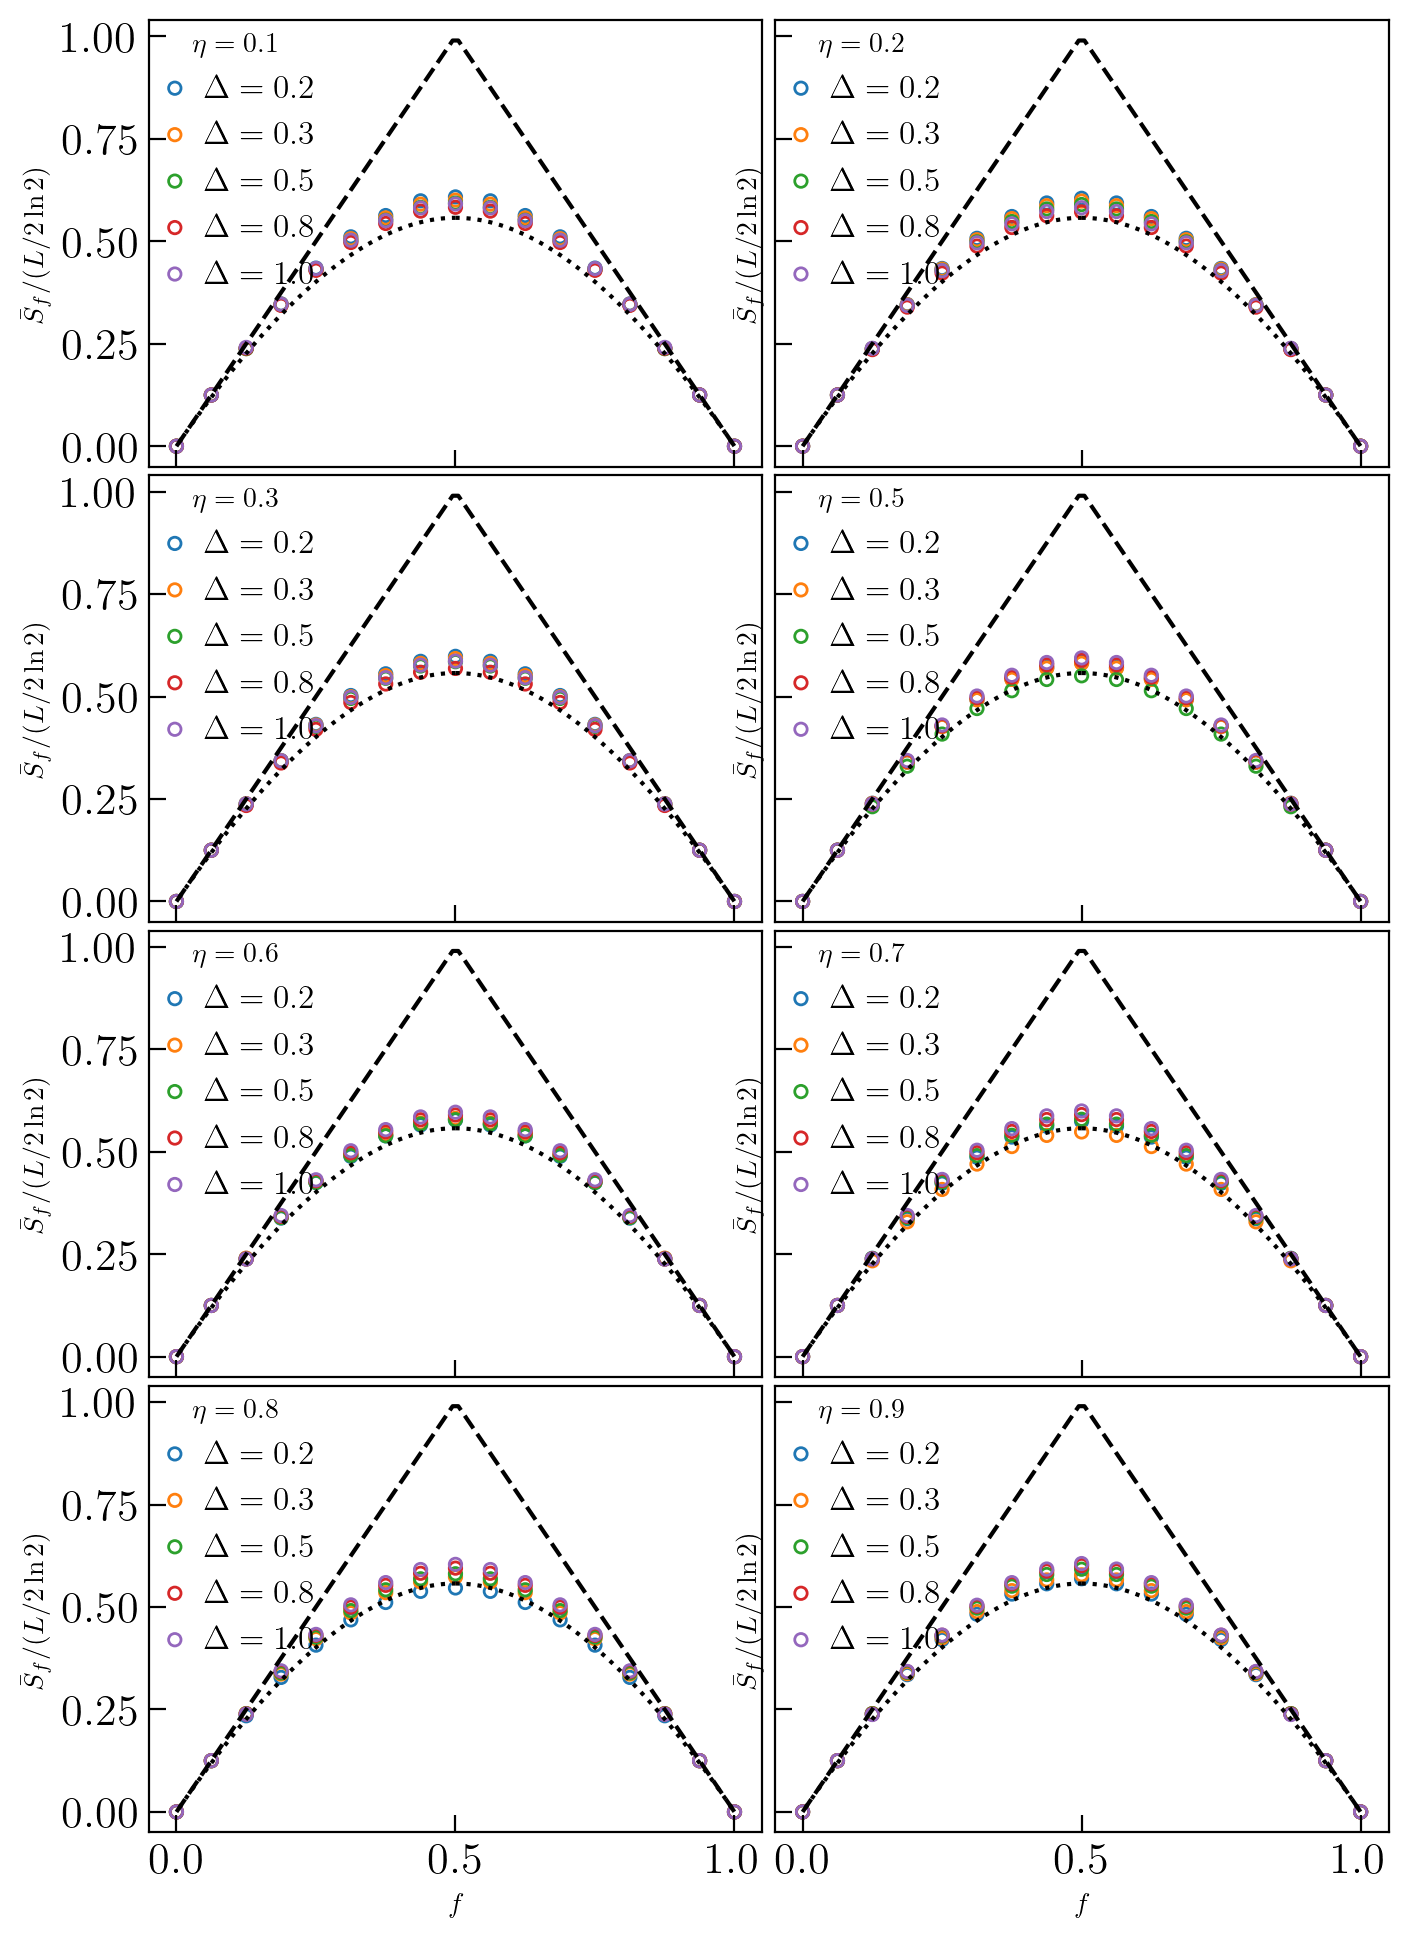

In [18]:

markers = itertools.cycle(markers_ls)

L=16

J1=1.0
d1=0.5
e1=0.3

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

f = 0.5
LA = int(L*f)
LA = 2

frac = lambda dim: 0.25 * dim

sizes = [16]

deltas = np.linspace(0.02, 1.00, 50)
etas = np.linspace(0.02, 1.00, 50)

fig, axis = plt.subplots( nrows=4, ncols=2, figsize=(8,12), dpi = 200, sharey=True)
axis = np.array(axis).flatten()

# deltas = [0.02, 0.1, 0.7]
# etas = [0.02, 0.5]
print(deltas)


real_sec, _ = get_sectors(L, hx, hz)

pred = L * (np.log(2) / 2 - 41 / 288)

dim_tot = 2**L

subsystem_frac = np.linspace(0, 1, L+1)
print(subsystem_frac)
for jj, e1 in enumerate([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]):
    colors_ls_cyc = itertools.cycle(colors_ls)
    for ii, d1 in enumerate([0.2, 0.3, 0.5, 0.8, 1.0]):
        
        entropy_ave = np.zeros((L+1))

        for LA in range(L//2 + 1):
            dim_tot = 0
            for [ks, ps, zxs, zzs] in real_sec:
                name = dir + 'Entropy/Eigenstate/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
                if exists(name):
                    with h5py.File(name, "r") as file:
                        energies = np.array(file.get('energies')[0])
                        entropies = np.array(file.get('entropy'))[LA]
                        dim = energies.size
                        dim_tot += dim

                        num = frac(dim)

                        E_av = np.mean(energies)
                        index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
                        
                        my_min = int(index_meanE - num / 2)
                        if my_min < 0: my_min = 0;  

                        my_max = int(index_meanE + num / 2) 
                        if my_max >= dim: my_max = dim

                        sample = entropies
                        if my_min > 0 and my_max < dim:
                            sample = entropies[my_min : my_max]
                        entropy_ave[LA] += dim * np.mean(sample) / 2**L
                        if LA < L//2: entropy_ave[L - LA] += dim * np.mean(sample) / 2**L
                else:
                    print(name)
            if dim_tot != 2**L:
                print("waaaaaaa", dim_tot, 2**L)
                
        axis[jj].scatter(subsystem_frac, entropy_ave / (L/2*np.log(2)), label=f"$\Delta={d1}$", color = next(colors_ls_cyc), s=20, facecolor='None')

    legend = axis[jj].legend(frameon=False, fontsize=12, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.04,1.04))
    legend.set_title(f"$\eta={e1}$")
    
    axis[jj].set_xlabel(r"$f$")
    axis[jj].set_ylabel(r"$\bar{S}_f/(L/2\ln2)$")
    
    ff = np.linspace(0, 1, 100)
    axis[jj].plot(ff, 1 - 2*np.abs(0.5 - ff), ls='--', color='black')
    
    ff = np.linspace(0., .5, 100)
    axis[jj].plot(ff, 2 * ff * (1 - (1 + (1-ff)/ff * np.log(1-ff) ) / np.log(2)), ls=':', color='black')
    
    ff = np.linspace(.5, 1., 100)
    axis[jj].plot(ff, 2 * (1-ff) * (1 - (1 + ff/(1-ff) * np.log(ff) ) / np.log(2)), ls=':', color='black')
    
    axis[jj].tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis[jj].tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)

fig.subplots_adjust(wspace = 0.02, hspace=0.02)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ]


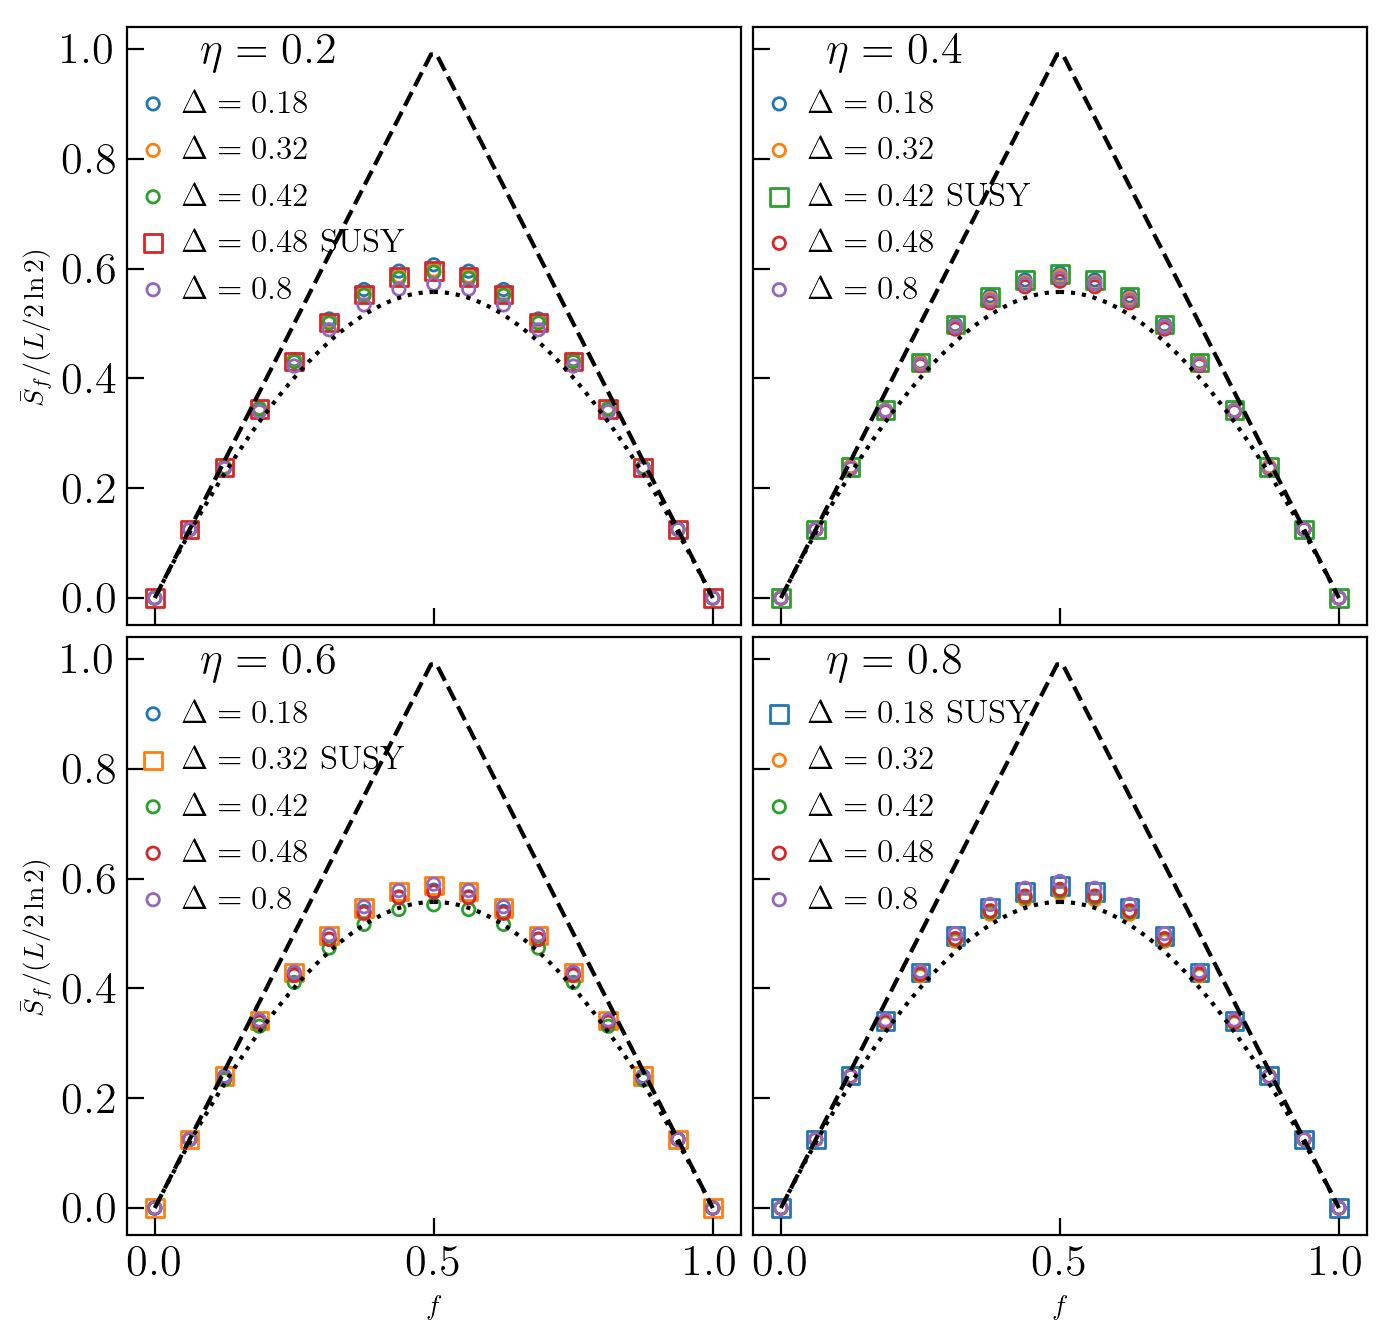

In [12]:

markers = itertools.cycle(markers_ls)

L=16

J1=1.0
d1=0.5
e1=0.3

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

f = 0.5
LA = int(L*f)
LA = 2

frac = lambda dim: 0.25 * dim

sizes = [16]

deltas = np.linspace(0.02, 1.00, 50)
etas = np.linspace(0.02, 1.00, 50)

fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(8,8), dpi = 200, sharey=True, sharex=True)
axis = np.array(axis).flatten()

# deltas = [0.02, 0.1, 0.7]
# etas = [0.02, 0.5]
print(deltas)


real_sec, _ = get_sectors(L, hx, hz)

dim_tot = 2**L

subsystem_frac = np.linspace(0, 1, L+1)
print(subsystem_frac)
for jj, e1 in enumerate([0.2, 0.4, 0.6, 0.8]):
    colors_ls_cyc = itertools.cycle(colors_ls)
    for ii, d1 in enumerate([0.18, 0.32, 0.42, 0.48, 0.8]):
        
        entropy_ave = np.zeros((L+1))

        for LA in range(L//2 + 1):
            dim_tot = 0
            for [ks, ps, zxs, zzs] in real_sec:
                name = dir + 'Entropy/Eigenstate/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
                if exists(name):
                    with h5py.File(name, "r") as file:
                        energies = np.array(file.get('energies')[0])
                        entropies = np.array(file.get('entropy'))[LA]
                        dim = energies.size
                        dim_tot += dim

                        num = frac(dim)

                        E_av = np.mean(energies)
                        index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
                        
                        my_min = int(index_meanE - num / 2)
                        if my_min < 0: my_min = 0;  

                        my_max = int(index_meanE + num / 2) 
                        if my_max >= dim: my_max = dim

                        sample = entropies
                        if my_min > 0 and my_max < dim:
                            sample = entropies[my_min : my_max]
                        entropy_ave[LA] += dim * np.mean(sample) / 2**L
                        if LA < L//2: entropy_ave[L - LA] += dim * np.mean(sample) / 2**L
                else:
                    print(name)
            if dim_tot != 2**L:
                print("waaaaaaa", dim_tot, 2**L)
                
        _app = " SUSY" if np.abs(d1 - 0.5*(1-e1**2)) < 1e-10 else ""
        mar = 's' if np.abs(d1 - 0.5*(1-e1**2)) < 1e-10 else 'o'
        si = 40 if np.abs(d1 - 0.5*(1-e1**2)) < 1e-10 else 20
        axis[jj].scatter(subsystem_frac, entropy_ave / (L/2*np.log(2)), label=f"$\Delta={d1}$" + _app, color = next(colors_ls_cyc), s=si, marker = mar, facecolor='None')

    legend = axis[jj].legend(frameon=False, fontsize=12, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.04,1.04), title=f"$\eta={e1}$", title_fontsize=16)
    
    if jj     >  0: axis[jj].set_xlabel(r"$f$")
    if jj % 2 == 0: axis[jj].set_ylabel(r"$\bar{S}_f/(L/2\ln2)$")
    
    ff = np.linspace(0, 1, 100)
    axis[jj].plot(ff, 1 - 2*np.abs(0.5 - ff), ls='--', color='black')
    
    ff = np.linspace(0., .5, 100)
    axis[jj].plot(ff, 2 * ff * (1 - (1 + (1-ff)/ff * np.log(1-ff) ) / np.log(2)), ls=':', color='black')
    
    ff = np.linspace(.5, 1., 100)
    axis[jj].plot(ff, 2 * (1-ff) * (1 - (1 + ff/(1-ff) * np.log(ff) ) / np.log(2)), ls=':', color='black')
    
    axis[jj].tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
    axis[jj].tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)

fig.subplots_adjust(wspace = 0.02, hspace=0.02)

0.2
0.4
0.6
0.8
1.0


(-10.0, 10.0)

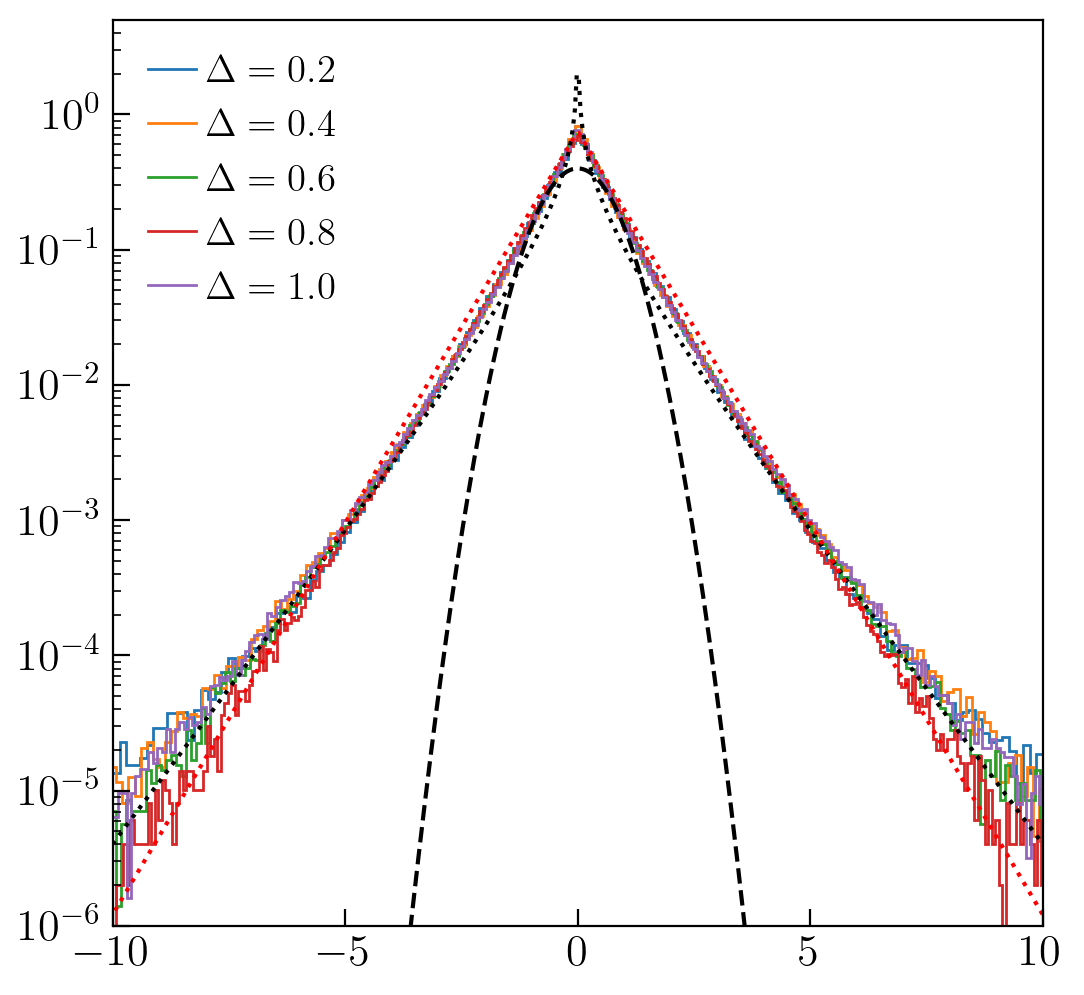

In [61]:

markers = itertools.cycle(markers_ls)

L=16

J1=1.0
d1=0.5
e1=0.2

J2=0.0
d2=0.0
e2=0.0

hx=0.0
hz=0.0

k=0
p=1
zx=1
zz=1

f = 0.5
LA = int(L*f)
LA = 2

frac = lambda dim: 0.25 * dim

sizes = [16]

deltas = np.linspace(0.02, 1.00, 50)
etas = np.linspace(0.02, 1.00, 50)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200, sharey=True)


real_sec, _ = get_sectors(L, hx, hz)

pred = L * (np.log(2) / 2 - 41 / 288)

dim_tot = 2**L
colors_ls_cyc = itertools.cycle(colors_ls)
for ii, d1 in enumerate([0.2, 0.4, 0.6, 0.8, 1.0]):
    entropy = []
    energy = []
    states = []
    for [ks, ps, zxs, zzs] in real_sec:
        name = dir + 'Entropy/Eigenstate/' + info_sym(L, J1, J2, d1, d2, e1, e2, hx, hz, ks, ps, zxs, zzs) + ".hdf5"
        if exists(name):
            with h5py.File(name, "r") as file:
                energies = np.array(file.get('energies')[0])
                entropies = np.array(file.get('entropy'))[LA]
                dim = energies.size
                V = np.array(file.get('eigenvectors'))
                V = V.flatten()
                
                V = (V / np.std(V))
                energies /= np.std(energies)
                
                energy = [*energy, *energies]
                entropy = [*entropy, *entropies]
                states = [*states, *V]
        else:
            print(name)
    print(d1)
    bins, hist = np.histogram(states, bins=300, normed=True)
    axis.stairs(bins, hist, label=f"$\Delta={d1}$", color = next(colors_ls_cyc))


legend = axis.legend(frameon=False, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.00,1.00))
en = np.linspace(-20, 20, 1000)
axis.plot(en, 1/np.sqrt(2*np.pi) * np.exp(-en**2), ls='--', color='black')
axis.plot(en, 1/np.sqrt(np.abs(4*np.pi*en)) * np.exp(-np.abs(en)), ls=':', color='black')
axis.plot(en, 3/4*np.exp(-4/3 * np.abs(en)), ls=':', color='red')

axis.tick_params(axis='both', which='major', direction="in",length=6, labelsize=16)#, length=font_size-4, width=0.05*font_size)
axis.tick_params(axis='both', which='minor', direction="in",length=3, labelsize=16)#, length=0.2*(font_size-4), width=0.05*font_size)
#axis.set_xscale('log');
axis.set_yscale('log')
axis.set_ylim(1e-6, 5e0)
axis.set_xlim(-10, 10)

# SUPERSYMMETRY

In [61]:
from sympy import init_session 
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [403]:
from sympy import Matrix, var
from sympy.physics.quantum import TensorProduct as tens
from sympy.physics.quantum.dagger import Dagger as dag
from sympy import Symbol, simplify
from sympy import I

eta = Symbol('eta', real=True)
lam = Symbol('lambda', real=True)
a = Symbol('a', real=True)
b = Symbol('b', real=True)

x1 = Symbol('x1', real=True)
x2 = Symbol('x2', real=True)
x3 = Symbol('x3', real=True)
x4 = Symbol('x4', real=True)

q1 = Matrix([[0, 1], [0, 0], [0, 0], [0, eta]])
q2 = Matrix([[eta, 0], [0, 0], [0, 0], [1, 0]])

e = Matrix([[1, 0], [0, 1]])

sigx = Matrix([[0, 1], [1, 0]])
sigy = Matrix([[0, -I], [I, 0]])
sigz = Matrix([[1, 0], [0, -1]])


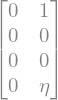

In [404]:
q1

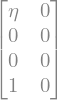

In [405]:
q2

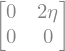

In [218]:
dag(q2) * (q1)

In [219]:
A1 = tens(q1, e)
A2 = tens(e, q1)

B1 = (tens(q2, e))
B2 = (tens(e, q2))

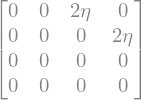

In [220]:
C1 = (dag(B1) * A1)
C1

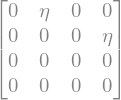

In [221]:
C2 = (dag(B1) * A2)
C2

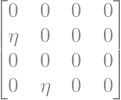

In [173]:
C3 = (dag(B2) * A1)
C3

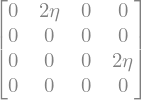

In [222]:
C4 = (dag(B2) * A2)
C4

In [223]:
A1 = tens(q1, e, e)
A2 = tens(e, q1, e)
A3 = tens(e, e, q1)

B1 = tens(q2, e, e)
B2 = tens(e, q2, e)
B3 = tens(e, e, q2)

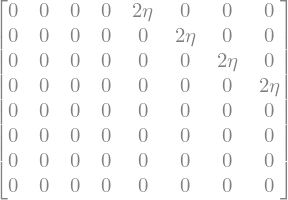

In [224]:
P =  dag(B1) * A1
P 

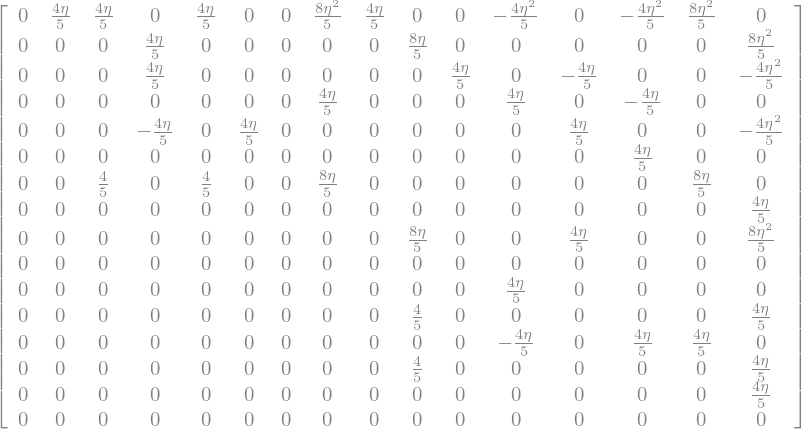

In [228]:
L=4

def make_matrix(L, pos, q):
    """
    Makes local supercharge 2^L+1 x 2^L at position pos
    """
    M = e if pos > 0 else q
    for indexi in range(1, L):
        M = tens(M, e) if indexi != pos else tens(M, q)
    return M

CN = zeros(2**(L), 2**L)

for ii in range(L):
    for jj in range(L):
        Q2 = make_matrix(L, ii, q2)
        Q1 = make_matrix(L, jj, q1)
        CN = CN + (-1)**(ii + jj) * dag(Q2) * Q1
CN = CN * L / (L+1)
#CN = CN + dag(CN)
#CN = CN.subs({eta: 0.5})
# a = CN.eigenvals()
# list(a)
# for xx in a:
#     print(xx)
CN

In [208]:
def make_product(L, op):
    M = op
    for indexi in range(1, L): 
        M = tens(M, op)
    return M
def make_Q(L):
    Q = make_matrix(L, 0, q1)
    for ii in range(1, L):
        M = make_matrix(L, ii, q1)
        Q = Q + (-1)**(ii) * M



In [ ]:
Px = make_product(L, sigx)
Py = make_product(L, sigy)
Pz = make_product(L, sigz)

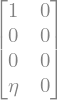

In [215]:
x = tens(sigz, sigz) * q2 * sigz


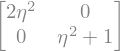

In [521]:
def ham_density(q):
    A = -tens(dag(q), e) * tens(e, q) - tens(e, dag(q)) * tens(q, e)
    return A + q * dag(q) + 0.5 * ( tens(dag(q) * q, e) + tens(e, dag(q) * q) )

q_obc = q1 + Matrix([[2*x1, 0], [x2, x1], [x2, x1], [0, 2*x2]])

q_obc = q_obc.subs({x2: -eta})
q_obc = q_obc.subs({x1: 0})
dag(q_obc) * q_obc

# x = (tens(q_obc, e) * q_obc - tens(e, q_obc) * q_obc)


# m = Matrix([a, b])

# bound = dag(q_obc) * q_obc / 2
# #x * m
# #ham_density(q_obc).subs({lam: eta})

# bound = -(1-eta)*x1 / (1+(x1**2 + x2*2)) * sigx - (1+eta)*x2 / (1+(x1**2 + x2*2)) * sigy + (eta**2-1)/4*( (1-(x1**2 + x2*2)) / (1+(x1**2 + x2*2)) ) * sigz
# bound = (bound.subs({x1 : 0})).subs({x2: 1})
# sigy * bound * sigy - bound

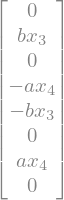

In [439]:

chi = Matrix([x3, 0, 0, x4])
tens(chi, m) - tens(m, chi)

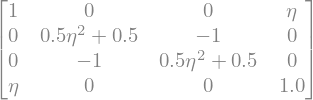

In [522]:

h2 = ham_density(q_obc)
h2

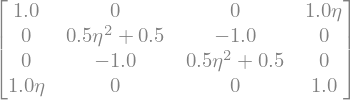

In [523]:
h = (1 - eta) * tens(sigx, sigx) + (1 + eta) * tens(sigy, sigy) + (eta**2 - 1) / 2 * tens(sigz, sigz)
h = (3 + eta**2) / 4 * tens(e,e) - 0.5*h
h

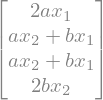

In [517]:
q_obc = q1 + Matrix([[2*x1, 0], [x2, x1], [x2, x1], [0, 2*x2]])
dag(q_obc)
q_obc

m = Matrix([a, b])
chi = Matrix([x1, x2])

tens(m, chi) + tens(chi, m)